# Load packages

In [1]:
import os
import pandas as pd

import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile

import librosa
import matplotlib.pyplot as plt
import seaborn as sns

# Simple dataset exploration

In [2]:
TRAIN_AUDIO_PATH = 'tensorflow-speech-recognition-challenge/train/audio'
dirs = [f for f in os.listdir(TRAIN_AUDIO_PATH)]
len(dirs)

31

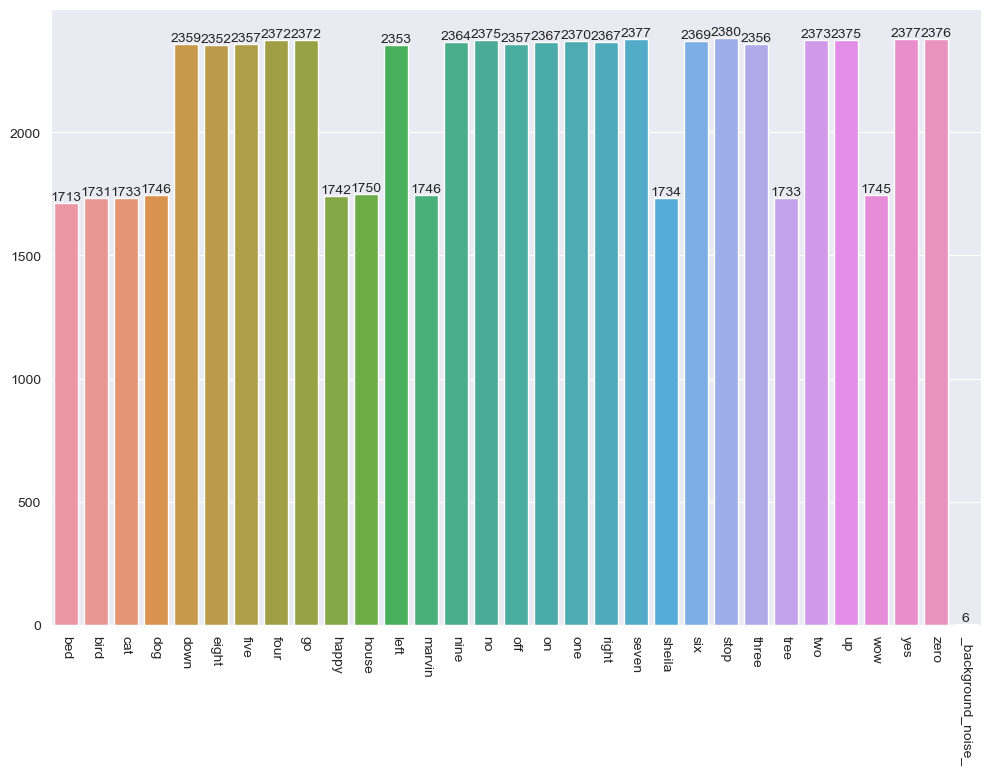

In [3]:
number_of_recordings = []
for dir in dirs:
    waves = [f for f in os.listdir(os.path.join(TRAIN_AUDIO_PATH, dir)) if f.endswith('.wav')]
    number_of_recordings.append(len(waves))

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=dirs, y=number_of_recordings)
ax.bar_label(ax.containers[-1], label_type='edge')
ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)
plt.show()

In [4]:
results = []
for dir in dirs:
    waves = [f for f in os.listdir(os.path.join(TRAIN_AUDIO_PATH, dir)) if f.endswith('.wav')]
    for wav in waves:
        res = {
            "dir": dir,
            "wav": wav,
            "length": librosa.get_duration(path=os.path.join(TRAIN_AUDIO_PATH, dir, wav))
        }
        results.append(res)

results_df = pd.DataFrame(results)
results_df

,dir,wav,length
0,bed,00176480_nohash_0.wav,1.000000
1,bed,004ae714_nohash_0.wav,1.000000
2,bed,004ae714_nohash_1.wav,0.928813
3,bed,00f0204f_nohash_0.wav,1.000000
4,bed,00f0204f_nohash_1.wav,1.000000
...,...,...,...
64722,_background_noise_,dude_miaowing.wav,61.805687
64723,_background_noise_,exercise_bike.wav,61.253875
64724,_background_noise_,pink_noise.wav,60.000000
64725,_background_noise_,running_tap.wav,61.155500


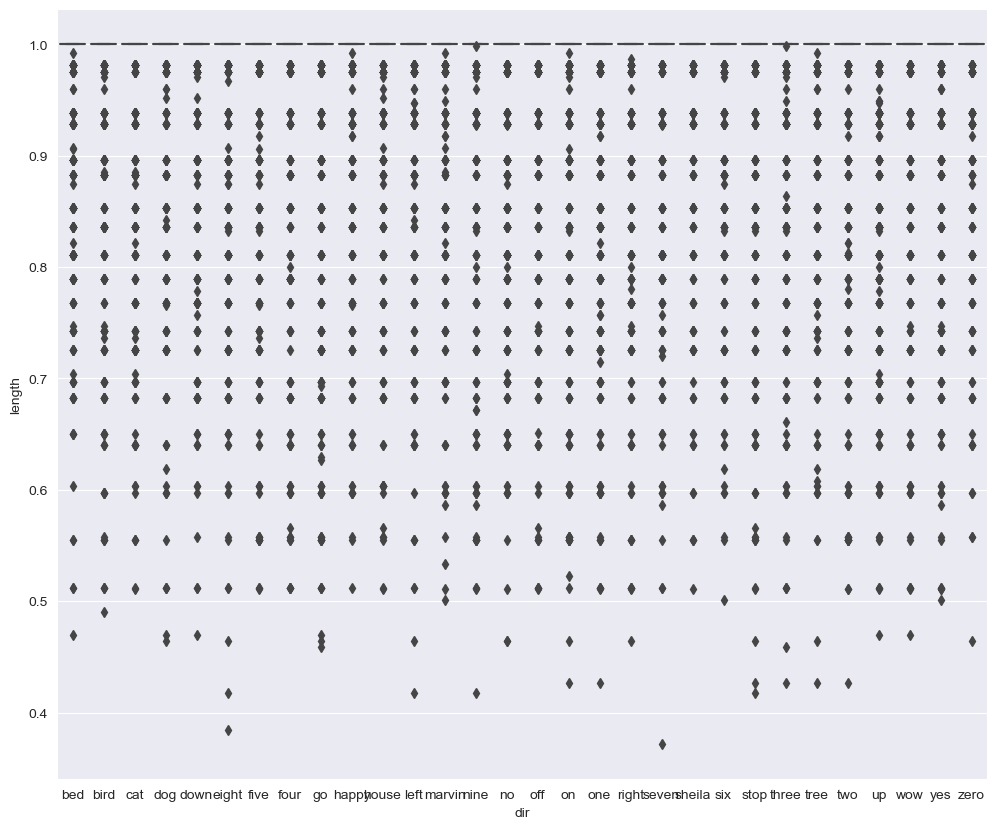

In [5]:
plt.figure(figsize=(12, 10))
sns.boxplot(results_df.loc[results_df.dir != "_background_noise_"], x="dir", y="length")
plt.show()

In [6]:
results_df["1sec"] = results_df.length == 1
results_df.groupby(by="dir").agg({"1sec": "sum", "wav": "count"})

,1sec,wav
dir,,
_background_noise_,0,6
bed,1484,1713
bird,1521,1731
cat,1515,1733
dog,1547,1746
down,2152,2359
eight,2111,2352
five,2161,2357
four,2158,2372


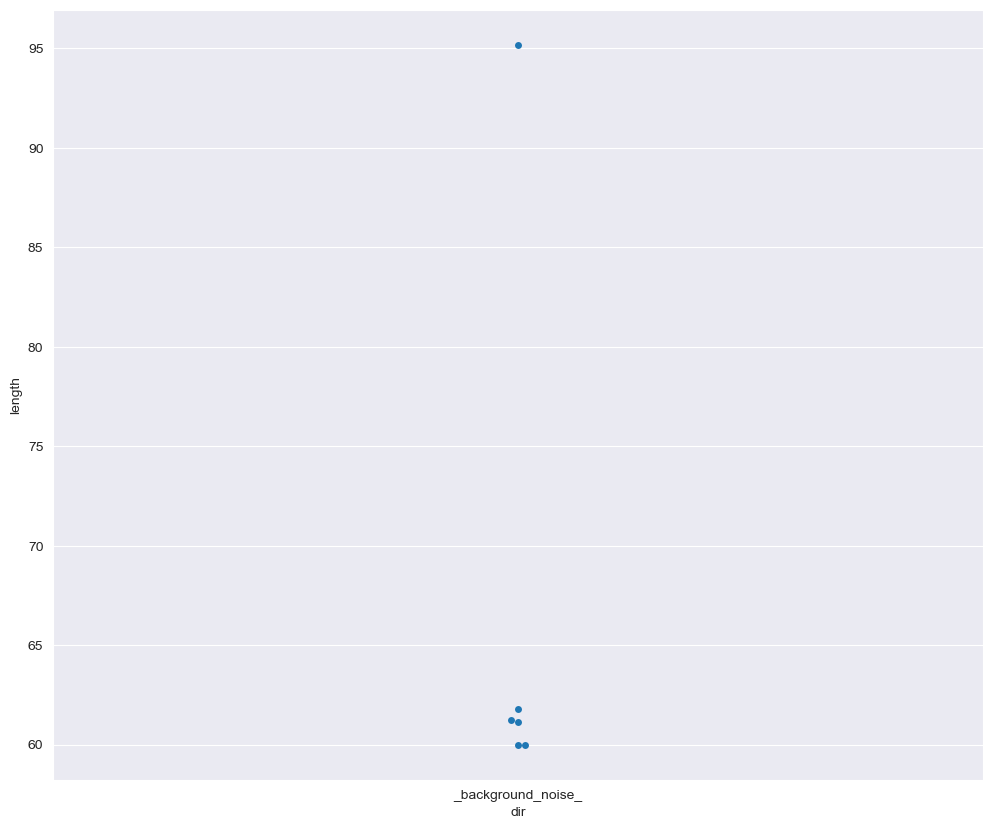

In [7]:
plt.figure(figsize=(12, 10))
sns.swarmplot(results_df.loc[results_df.dir == "_background_noise_"], x="dir", y="length")
plt.show()